In [2]:
%pip install scikit-learn numpy pandas matplotlib tqdm

  Using cached scikit_learn-1.7.2-cp312-cp312-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached numpy-2.3.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.6-cp312-cp312-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached scipy-1.16.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-n

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd

X, Y = load_breast_cancer(return_X_y=True)
Y[Y == 0] = -1

print(f"X shape: {X.shape}")
print(f"y shape: {Y.shape}")
print(f"Classes: {np.unique(Y)}")

X shape: (569, 30)
y shape: (569,)
Classes: [-1  1]


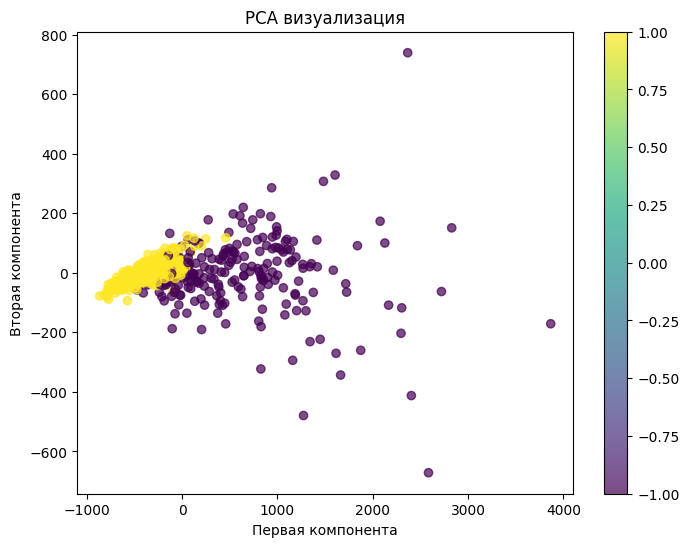

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('PCA визуализация')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()


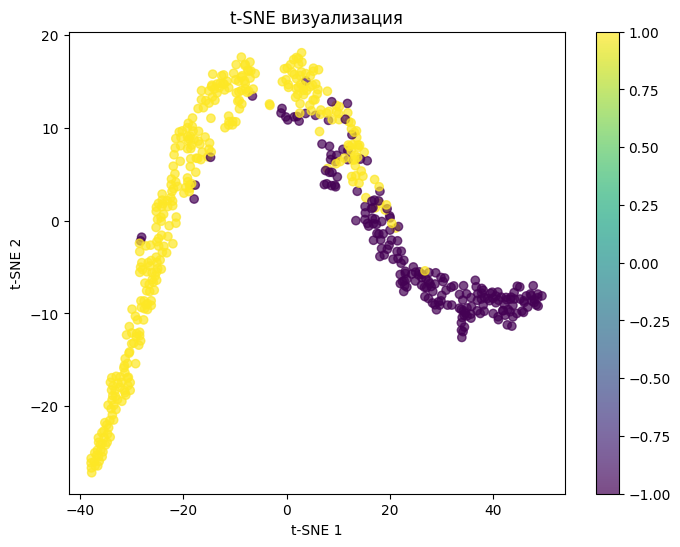

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('t-SNE визуализация')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = KNeighborsClassifier(
    n_neighbors=6,
    weights='uniform',
    algorithm='auto',
    metric='minkowski',
    p=2
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

Confusion Matrix:
[[ 60   3]
 [  3 105]]

Accuracy: 0.965
Precision: 0.965
Recall: 0.965
F1-score: 0.965


In [5]:
import matplotlib.pyplot as plt
from source.knn_classifier import SimpleKNNClassifier

model_auto = SimpleKNNClassifier(k=6)
model_auto.fit(X_train, y_train)
y_pred_auto = model_auto.predict(X_test)

print("Automatic k selection results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_auto))
print()
print(f"Accuracy: {accuracy_score(y_test, y_pred_auto):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_auto, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_auto, average='weighted'):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred_auto, average='weighted'):.3f}")
print(f"Selected k: {model_auto.k}")

Automatic k selection results:
Confusion Matrix:
[[ 57   6]
 [  1 107]]

Accuracy: 0.959
Precision: 0.960
Recall: 0.959
F1-score: 0.959
Selected k: 6


Automatic k selection results:
Confusion Matrix:
[[ 58   5]
 [  1 107]]

Accuracy: 0.965
Precision: 0.966
Recall: 0.965
F1-score: 0.965
Selected k: 1


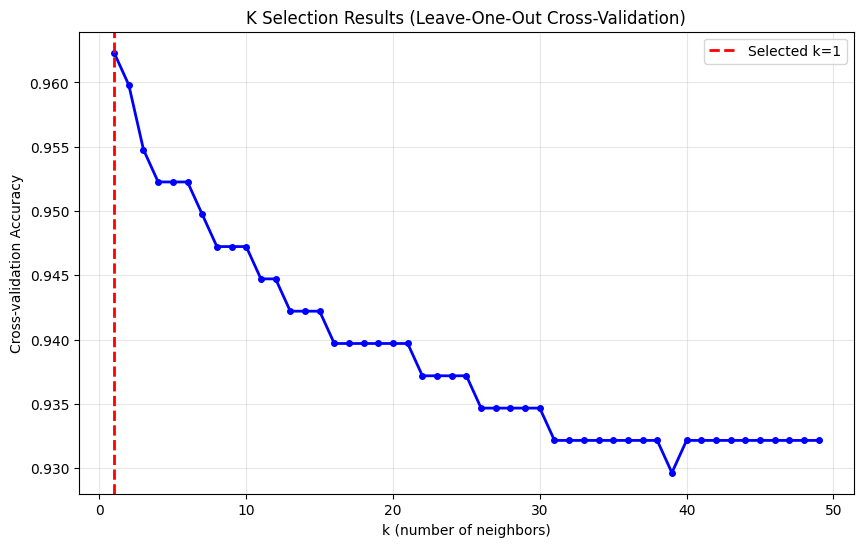

In [6]:
import matplotlib.pyplot as plt
from source.knn_classifier import SimpleKNNClassifier

class KSelectionTracker:
    def __init__(self):
        self.k_results = []
    
    def callback(self, results):
        self.k_results = results

tracker = KSelectionTracker()

model_auto = SimpleKNNClassifier(k=None, ker='gaussian')
model_auto.fit(X_train, y_train, k_selection_callback=tracker.callback)
y_pred_auto = model_auto.predict(X_test)

print("Automatic k selection results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_auto))
print()
print(f"Accuracy: {accuracy_score(y_test, y_pred_auto):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_auto, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_auto, average='weighted'):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred_auto, average='weighted'):.3f}")
print(f"Selected k: {model_auto.k}")

plt.figure(figsize=(10, 6))
k_values = range(1, len(tracker.k_results) + 1)
plt.plot(k_values, tracker.k_results, 'b-', linewidth=2, marker='o', markersize=4)
plt.axvline(x=model_auto.k, color='red', linestyle='--', linewidth=2, label=f'Selected k={model_auto.k}')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Cross-validation Accuracy')
plt.title('K Selection Results (Leave-One-Out Cross-Validation)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

k_values = []
test_accuracies = []

for k in tqdm(range(1, len(X_train))):
    model_k = SimpleKNNClassifier(k=k, ker='rectangular')
    model_k.fit(X_train, y_train)
    y_pred_k = model_k.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_k)
    k_values.append(k)
    test_accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, 'g-', linewidth=1, marker='', markersize=4)
plt.xlabel('k (number of neighbors)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs k (Number of Neighbors)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


  6%|▋         | 25/397 [00:13<03:16,  1.90it/s]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm


plt.figure(figsize=(10, 6))
plt.plot(k_values, list(map(lambda x: 1 - x, test_accuracies)), 'g-', linewidth=1, marker='', markersize=4)
plt.xlabel('k (number of neighbors)')
plt.ylabel('Empirical risk')
plt.title('Empirical risk vs k (Number of Neighbors)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


100%|██████████| 378/378 [02:03<00:00,  3.05it/s]


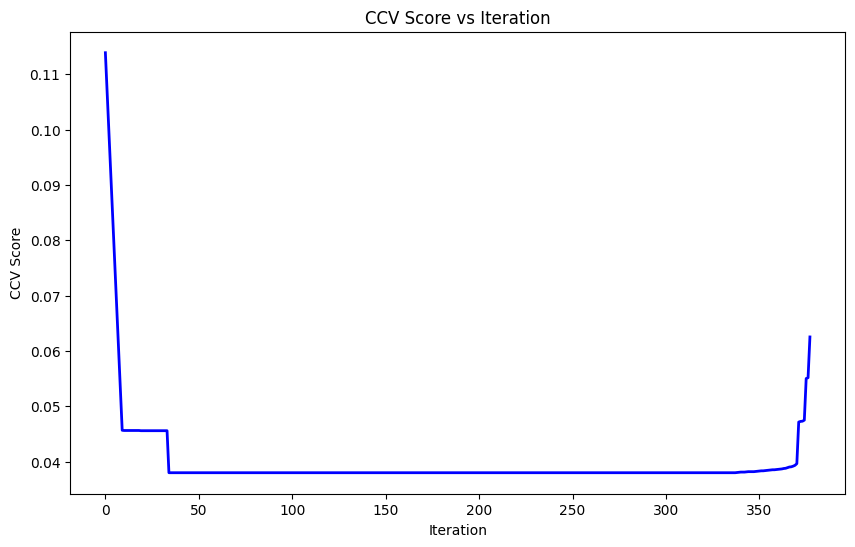

In [ ]:
import matplotlib.pyplot as plt
from source.knn_classifier import SimpleKNNClassifier
import numpy as np

model_ccv = SimpleKNNClassifier(k=6, ker='rectangular')
model_ccv.fit(X_train, y_train)

ccv_scores = []
def ccv_callback(score):
    global ccv_scores
    ccv_scores.append(score)

model_ccv.adjust_ref_by_ccv(ccv_callback)

plt.figure(figsize=(10, 6))
plt.plot(ccv_scores, 'b-', linewidth=2, marker='', markersize=4)
plt.xlabel('Iteration')
plt.ylabel('CCV Score')
plt.title('CCV Score vs Iteration')
plt.show()



In [ ]:
model_ccv.shrink_x_by_ref_elements(removed_samples = 350)
y_pred = model_ccv.predict(X_test)

print("Automatic k selection results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print()
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.3f}")
print(f"Selected k: {model_ccv.k}")
print(f"Train size: {len(model_ccv.shrinked_y_train)}")

Automatic k selection results:
Confusion Matrix:
[[ 60   3]
 [  5 103]]

Accuracy: 0.953
Precision: 0.954
Recall: 0.953
F1-score: 0.953
Selected k: 6
Train size: 47


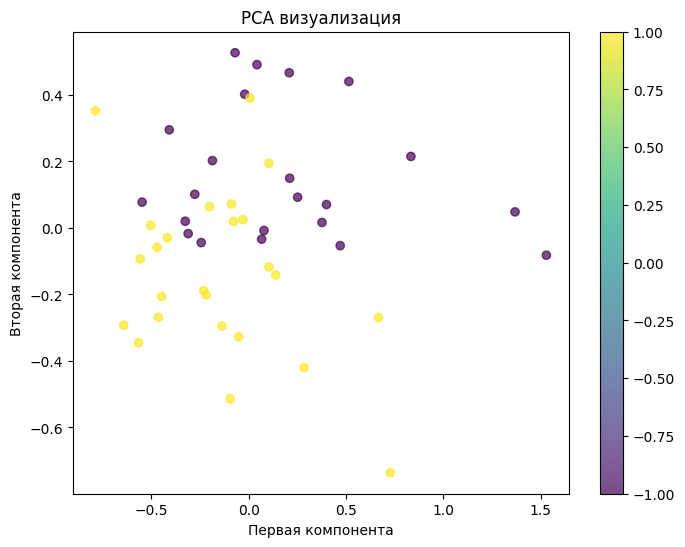

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(model_ccv.shrinked_X_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model_ccv.shrinked_y_train, cmap='viridis', alpha=0.7)
plt.colorbar()
plt.title('PCA визуализация')
plt.xlabel('Первая компонента')
plt.ylabel('Вторая компонента')
plt.show()
